**Table of contents**<a id='toc0_'></a>    
- 1. [Preface](#toc1_)    
  - 1.1. [Map](#toc1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[Preface](#toc0_)

## 1.1. <a id='toc1_1_'></a>[Map](#toc0_)

TypeError: Axes.pie() got an unexpected keyword argument 'transform'

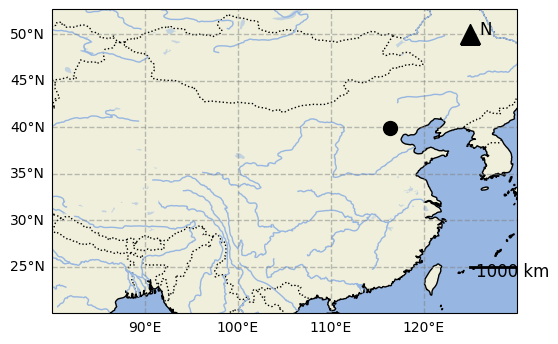

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

# 1. 准备数据
data = [
    {'lat': 39.9042, 'lon': 116.4074, 'values': [0.4, 0.3, 0.3], 'labels': ['A', 'B', 'C']},  # 北京
    {'lat': 22.5431, 'lon': 114.0579, 'values': [0.2, 0.5, 0.3], 'labels': ['A', 'B', 'C']},  # 深圳
    {'lat': 31.2304, 'lon': 121.4737, 'values': [0.1, 0.6, 0.3], 'labels': ['A', 'B', 'C']},  # 上海
    {'lat': 30.5928, 'lon': 104.0668, 'values': [0.5, 0.2, 0.3], 'labels': ['A', 'B', 'C']},  # 成都
    {'lat': 40.0583, 'lon': 116.3002, 'values': [0.3, 0.4, 0.3], 'labels': ['A', 'B', 'C']},  # 天津
]

# 2. 创建地图
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 设置地图范围为中国
ax.set_extent([80, 130, 20, 50])

# 添加地理特征
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# 添加经纬度网格
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# 添加方向指示器
north_arrow_x, north_arrow_y = 125, 50
ax.plot(north_arrow_x, north_arrow_y, 'k^', markersize=15, transform=ccrs.PlateCarree())
ax.text(north_arrow_x + 1, north_arrow_y, 'N', fontsize=12, transform=ccrs.PlateCarree())

# 添加比例尺
scale_bar_length = 1000  # 1000 km
scale_bar_x, scale_bar_y = 125, 25
ax.plot([scale_bar_x, scale_bar_x + scale_bar_length / 111], [scale_bar_y, scale_bar_y],
        color='black', linewidth=2, transform=ccrs.PlateCarree())
ax.text(scale_bar_x + scale_bar_length / 222, scale_bar_y - 1, f'{scale_bar_length} km',
        fontsize=12, ha='center', transform=ccrs.PlateCarree())

# 3. 绘制点并叠加饼图
for sample in data:
    lat, lon = sample['lat'], sample['lon']
    values = sample['values']
    labels = sample['labels']

    # 绘制点
    ax.plot(lon, lat, marker='o', markersize=10, color='black', transform=ccrs.PlateCarree())

    # 计算饼图的中心位置
    center = Point(lon, lat).buffer(0.5)  # 缓冲区半径为 0.5 度

    # 绘制饼图
    pie_size = sum(values) * 10  # 饼图大小与总值成正比
    wedges, _ = ax.pie(values, radius=pie_size / 1000, center=(lon, lat),
                       colors=['red', 'green', 'blue'], wedgeprops=dict(width=0.3), transform=ccrs.PlateCarree())

# 4. 添加图例
legend_labels = ['A', 'B', 'C']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in ['red', 'green', 'blue']]
ax.legend(legend_handles, legend_labels, title="Legend", loc='upper right')

# 5. 添加标题和保存
plt.title("Sample Distribution with Pie Charts")
# plt.savefig("sample_distribution_map.png", dpi=300, bbox_inches='tight')
plt.show()